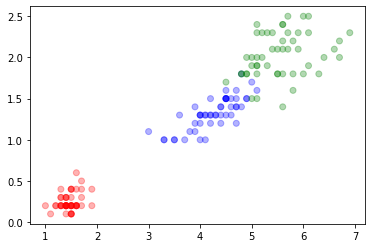

In [40]:
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
import time

# for i in tqdm(range(100)):
#     time.sleep(0.5)

class Item:
    def __init__(self, vector, label):
        self.vector = vector
        self.label = label

    def __repr__(self):
        return f"{self.vector} {self.label}"

data = []

with open('iris.data', 'r') as f:
    lines = f.readlines()[:-1]

    for line in lines:
        item = line.strip().split(",")
        vector = [float(x) for x in item[:4]]
        label = item[4]
        data.append(Item(vector, label))

# for item in data:
#     print(item.vector, item.label)

X = [item.vector[2] for item in data]
Y = [item.vector[3] for item in data]

species = {"Iris-setosa":"red", "Iris-versicolor":"blue","Iris-virginica":"green"}
C = [species[item.label] for item in data]

plt.scatter(X, Y, c=C, alpha=0.3)
plt.show()

  1%|          | 1/100 [00:00<00:16,  5.87it/s]

150 120 30


100%|██████████| 100/100 [00:15<00:00,  6.55it/s]


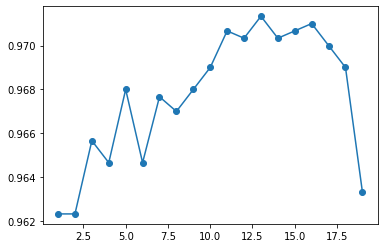

In [72]:
from collections import Counter

random.shuffle(data)

train_size = int(len(data) * 0.8)
train = data[:train_size]
test = data[train_size:]
print(len(data), len(train), len(test))

def distance(p1, p2):
    return sum((a-b) ** 2 for a, b in zip(p1, p2)) ** 0.5

def knn_classify(k, query, train):
    knns = sorted((distance(query, item.vector), item.label) for item in train)[:k]
    t = Counter(x[1] for x in knns).most_common(1)
    return t[0][0]

corrects = [0] * 20
num_trials = 100
train_size = int(len(data) * 0.8)

for _ in tqdm(range(num_trials)):
    random.shuffle(data)
    train = data[:train_size]
    test = data[train_size:]

    for k in range(1, 20):
        for item in test:
            answer = knn_classify(k, item.vector, train)
            if answer == item.label:
                corrects[k] += 1

accuracies = [c / (len(test) * num_trials) for c in corrects]
accuracies

plt.plot(range(1,20), accuracies[1:], 'o-')
plt.show()